In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data_path = 'db.csv'

In [3]:
df = pd.read_csv(f'{data_path}', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64765 entries, 0 to 64764
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Billing date       64765 non-null  int64 
 1   Material           64765 non-null  int64 
 2   Phisical quantity  64765 non-null  int64 
 3   Country            64765 non-null  int64 
 4   Net price          64765 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.5+ MB


In [4]:
df.head(10)

,Billing date,Material,Phisical quantity,Country,Net price
0,10052022,1795,10,7511,"2,865"
1,10052022,1778,5,7511,"0,66375"
2,10052022,1778,15,7511,"0,66375"
3,10052022,9526,4,7511,"36,31125"
4,10052022,1778,11,7511,"0,66375"
5,10052022,1778,15,7511,"0,66375"
6,10052022,1778,5,7511,"0,66375"
7,10052022,2844,2,7511,"35,185"
8,10052022,4151,6,7511,"31,47875"
9,10052022,2844,2,7511,"35,185"


### Creamos una columna de fecha

In [23]:
def process_date_str(number):
    string = str(number)
    if len(string) == 7:
        string = '0' + string
    return f'{string[4:]}-{string[2:4]}-{string[:2]}'

In [28]:
df['time_str'] = df['Billing date'].apply(process_date_str)
df['time'] = pd.to_datetime(df['time_str'], format='%Y-%m-%d')
df

,Billing date,Material,Phisical quantity,Country,Net price,time,time_str
0,10052022,1795,10,7511,"2,865",2022-05-10,2022-05-10
1,10052022,1778,5,7511,"0,66375",2022-05-10,2022-05-10
2,10052022,1778,15,7511,"0,66375",2022-05-10,2022-05-10
3,10052022,9526,4,7511,"36,31125",2022-05-10,2022-05-10
4,10052022,1778,11,7511,"0,66375",2022-05-10,2022-05-10
...,...,...,...,...,...,...,...
64760,30042024,1634,100,1526,"2,5175",2024-04-30,2024-04-30
64761,30042024,1634,2,1526,"2,5175",2024-04-30,2024-04-30
64762,30042024,1634,60,1526,"2,5175",2024-04-30,2024-04-30
64763,30042024,1679,2,1526,"29,5575",2024-04-30,2024-04-30


## Agrupacion de ventas

In [29]:
first_sale = df['time'].min()
first_sale

Timestamp('2018-08-24 00:00:00')

In [30]:
last_sale = df['time'].max()
last_sale

Timestamp('2024-09-26 00:00:00')

In [31]:
def string_format(agg):
    if agg == 'yearly':
        return 'year', '%Y'
    elif agg == 'monthly':
        return 'year_month', '%Y%m'
    elif agg == 'daily':
        return 'year_month_day', '%Y%m%d'
    elif agg == 'hourly':
        return 'year_month_day_hour', '%Y%m%d %H'
    else:
        raise Exception(f'Invalid aggregation type: {agg}')

### Agrupación de ventas por ítem

Vemos la cantidad de ventas por ítem

In [32]:
df.groupby('Material').count().reset_index()[['Material', 'Phisical quantity']].sort_values(by='Phisical quantity', ascending=False)

,Material,Phisical quantity
365,1872,375
1484,4488,311
957,3224,296
636,2489,286
2387,6633,261
...,...,...
2122,6000,1
797,2855,1
3132,8428,1
982,3295,1


Tomamos el material de ID `1872` que tiene un total de 375 ventas en total

In [34]:
material_id = 1872

#### Agrupación mensual

In [35]:
col_name, _string_format = string_format('monthly')

df[col_name] = df['time'].apply(lambda x: x.strftime(_string_format))
df

,Billing date,Material,Phisical quantity,Country,Net price,time,time_str,year_month
0,10052022,1795,10,7511,"2,865",2022-05-10,2022-05-10,202205
1,10052022,1778,5,7511,"0,66375",2022-05-10,2022-05-10,202205
2,10052022,1778,15,7511,"0,66375",2022-05-10,2022-05-10,202205
3,10052022,9526,4,7511,"36,31125",2022-05-10,2022-05-10,202205
4,10052022,1778,11,7511,"0,66375",2022-05-10,2022-05-10,202205
...,...,...,...,...,...,...,...,...
64760,30042024,1634,100,1526,"2,5175",2024-04-30,2024-04-30,202404
64761,30042024,1634,2,1526,"2,5175",2024-04-30,2024-04-30,202404
64762,30042024,1634,60,1526,"2,5175",2024-04-30,2024-04-30,202404
64763,30042024,1679,2,1526,"29,5575",2024-04-30,2024-04-30,202404


In [36]:
# Filtramos por el ítem y calculamos la distribución mensual de ventas
agg_by_month_order = df[df.Material == material_id].groupby(col_name)['Phisical quantity'].count()
agg_by_month_order

year_month
201808     1
201809     4
201810     5
201811     5
201812    12
          ..
202404     2
202405     6
202406    10
202407     4
202408     6
Name: Phisical quantity, Length: 70, dtype: int64

#### Agrupación diaria

In [37]:
col_name, _ = string_format('daily')

df[col_name] = df['time'].apply(lambda x: x.date())

In [38]:
agg_by_day_order = df[df.Material == material_id].groupby(col_name)['Phisical quantity'].count()
agg_by_day_order

year_month_day
2018-08-31    1
2018-09-18    1
2018-09-19    1
2018-09-24    2
2018-10-19    2
             ..
2024-07-19    1
2024-07-23    1
2024-08-21    1
2024-08-30    2
2024-08-31    3
Name: Phisical quantity, Length: 176, dtype: int64

### Elegimos la serie a utilizar

In [39]:
serie = agg_by_day_order.copy()
serie.info()

<class 'pandas.core.series.Series'>
Index: 176 entries, 2018-08-31 to 2024-08-31
Series name: Phisical quantity
Non-Null Count  Dtype
--------------  -----
176 non-null    int64
dtypes: int64(1)
memory usage: 6.8+ KB


In [40]:
serie

year_month_day
2018-08-31    1
2018-09-18    1
2018-09-19    1
2018-09-24    2
2018-10-19    2
             ..
2024-07-19    1
2024-07-23    1
2024-08-21    1
2024-08-30    2
2024-08-31    3
Name: Phisical quantity, Length: 176, dtype: int64

### Generamos el set de entrenamiento y set de test

In [43]:
def split_in_train_test(data, threshold):
    train = data[:threshold]
    test = data[threshold:]

    return train, test

train_orders, test_orders = split_in_train_test(serie, datetime(2024, 1, 1).date())

In [45]:
train_orders

year_month_day
2018-08-31    1
2018-09-18    1
2018-09-19    1
2018-09-24    2
2018-10-19    2
             ..
2023-11-12    1
2023-11-29    2
2023-11-30    8
2023-12-06    2
2023-12-20    1
Name: Phisical quantity, Length: 154, dtype: int64

In [46]:
test_orders

year_month_day
2024-01-23    1
2024-01-29    1
2024-01-31    2
2024-02-01    2
2024-02-19    2
2024-02-20    1
2024-02-22    1
2024-02-29    1
2024-04-23    2
2024-05-22    2
2024-05-29    4
2024-06-24    1
2024-06-26    2
2024-06-27    2
2024-06-28    1
2024-06-29    4
2024-07-18    2
2024-07-19    1
2024-07-23    1
2024-08-21    1
2024-08-30    2
2024-08-31    3
Name: Phisical quantity, dtype: int64

## Gráficos

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

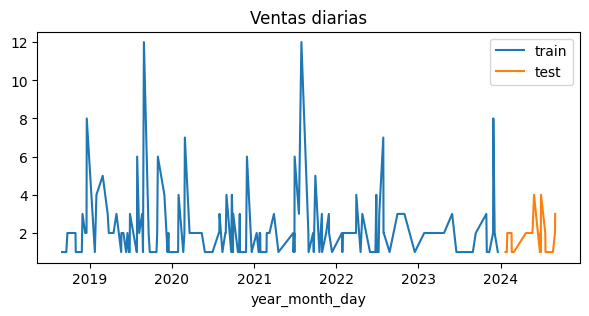

In [48]:
fig, ax=plt.subplots(figsize=(7, 3))
train_orders.plot(ax=ax, label='train')
test_orders.plot(ax=ax, label='test')
ax.set_title('Ventas diarias')
ax.legend();

In [49]:
train_df = pd.DataFrame()
train_df['period'] = train_orders.index
train_df['orders'] = train_orders.values

train_df

,period,orders
0,2018-08-31,1
1,2018-09-18,1
2,2018-09-19,1
3,2018-09-24,2
4,2018-10-19,2
...,...,...
149,2023-11-12,1
150,2023-11-29,2
151,2023-11-30,8
152,2023-12-06,2


In [50]:
train_df

,period,orders
0,2018-08-31,1
1,2018-09-18,1
2,2018-09-19,1
3,2018-09-24,2
4,2018-10-19,2
...,...,...
149,2023-11-12,1
150,2023-11-29,2
151,2023-11-30,8
152,2023-12-06,2


### Distribución diaria de compras

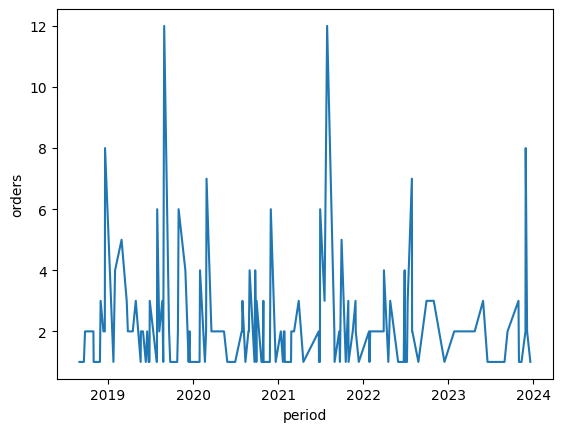

In [51]:
sns.lineplot(train_df, x='period', y='orders')
plt.show()

### Distribución mensual de compras

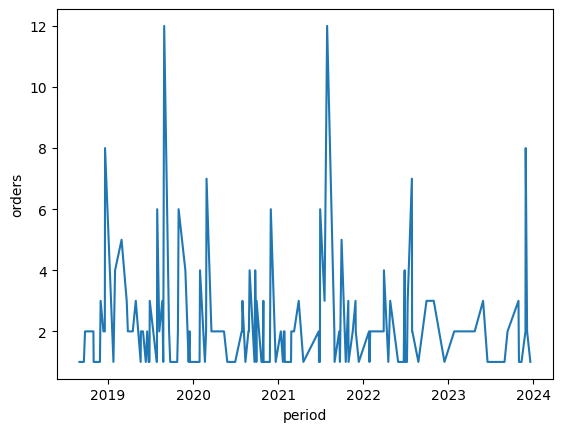

In [52]:
sns.lineplot(train_df, x='period', y='orders')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

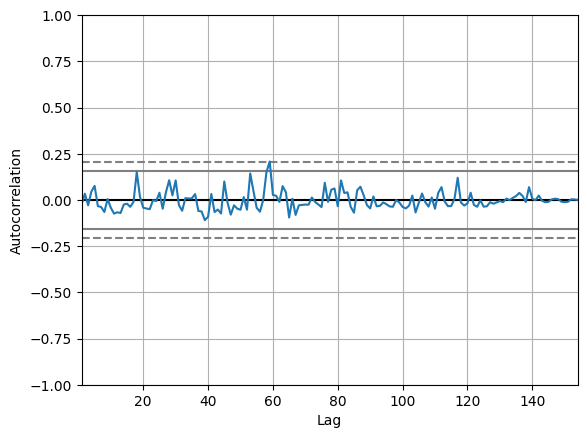

In [53]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train_df['orders'])

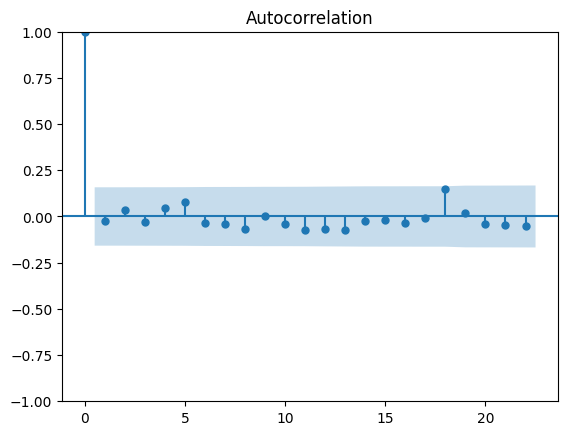

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_df['orders'])
plt.show()

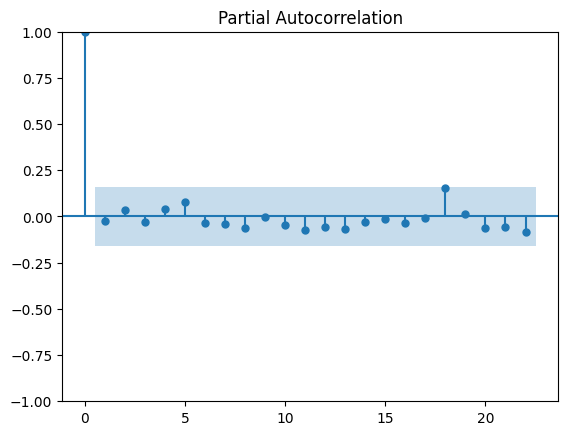

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train_df['orders'])
plt.show()

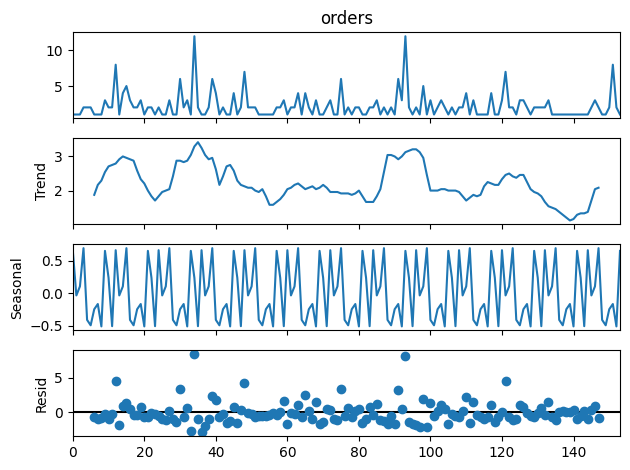

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(train_df['orders'], model='additive', period=12)
decomposition.plot()
plt.show()

### Entrenamos con SARIMA

In [57]:
# Creamos el set de test
test_df = pd.DataFrame()
test_df['period'] = test_orders.index
test_df['orders'] = test_orders.values

test_df.head(10)

,period,orders
0,2024-01-23,1
1,2024-01-29,1
2,2024-01-31,2
3,2024-02-01,2
4,2024-02-19,2
5,2024-02-20,1
6,2024-02-22,1
7,2024-02-29,1
8,2024-04-23,2
9,2024-05-22,2


In [58]:
train_df.head(10)

,period,orders
0,2018-08-31,1
1,2018-09-18,1
2,2018-09-19,1
3,2018-09-24,2
4,2018-10-19,2
5,2018-10-30,2
6,2018-10-31,1
7,2018-11-26,1
8,2018-11-27,1
9,2018-11-30,3


In [59]:
import pmdarima as pmd
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_autoarima = pmd.auto_arima(train_df['orders'],
                     start_p=1,
                     start_q=1,
                     test='adf',
                     m=12,
                     seasonal=True,
                     trace=True)


model_autoarima = SARIMAX(endog = train_orders, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = model_autoarima.fit(disp=0)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=626.318, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=629.443, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=629.444, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=761.007, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=627.613, Time=0.09 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=627.605, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=628.240, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=628.245, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=630.079, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.627 seconds


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
test_df.head(10)

,period,orders
0,2024-01-23,1
1,2024-01-29,1
2,2024-01-31,2
3,2024-02-01,2
4,2024-02-19,2
5,2024-02-20,1
6,2024-02-22,1
7,2024-02-29,1
8,2024-04-23,2
9,2024-05-22,2


In [61]:
predictions_statsmodels = modelo_res.get_forecast(steps=len(test_df)).predicted_mean.reset_index()['predicted_mean']

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
test_df['predicted'] = predictions_statsmodels
test_df.head()

,period,orders,predicted
0,2024-01-23,1,1.951513
1,2024-01-29,1,1.409295
2,2024-01-31,2,2.322767
3,2024-02-01,2,2.372901
4,2024-02-19,2,2.054120


In [63]:
# Plots the forecasts against the data
melt_df = pd.melt(test_df, ['period'])
melt_df

,period,variable,value
0,2024-01-23,orders,1.000000
1,2024-01-29,orders,1.000000
2,2024-01-31,orders,2.000000
3,2024-02-01,orders,2.000000
4,2024-02-19,orders,2.000000
5,2024-02-20,orders,1.000000
6,2024-02-22,orders,1.000000
7,2024-02-29,orders,1.000000
8,2024-04-23,orders,2.000000
9,2024-05-22,orders,2.000000


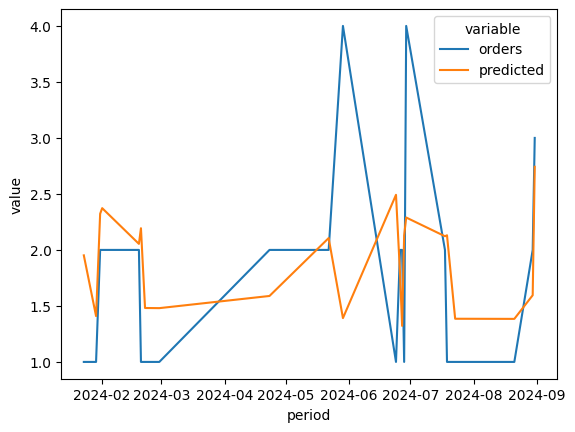

In [64]:
sns.lineplot(melt_df, x='period', y='value', hue='variable')
plt.show()

### Skforecast (es un wrapper de Statsmodels)

In [65]:
from skforecast.Sarimax import Sarimax

In [66]:
modelo_skforecast = Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
modelo_skforecast.fit(y=train_orders)
modelo_skforecast.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Phisical quantity   No. Observations:                  154
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -305.507
Date:                            Thu, 03 Oct 2024   AIC                            621.015
Time:                                    19:48:57   BIC                            635.759
Sample:                                         0   HQIC                           627.006
                                            - 154                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0128      0.133     -0.097      0.923      -0.273       0.247
ma.L1         -0.9993      2.074     -0.482      0.630      -5.065       3.066
ar.S.L12      -0.1149      0.101     -1.139      0.255      -0.313       0.083
ma.S.L12      -0.8355      0.166     -5.038      0.000      -1.161      -0.510
sigma2         3.7606      7.879      0.477      0.633     -11.682      19.203
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               451.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             2.15
Prob(H) (two-sided):                  0.07   Kurtosis:                        10.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
predictions_skforecast = modelo_skforecast.predict(steps=len(test_orders)).reset_index()['pred']
display(predictions_skforecast.head(10))

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0    1.951513
1    1.409295
2    2.322767
3    2.372901
4    2.054120
5    2.193696
6    1.481553
7    1.480183
8    1.588859
9    2.105842
Name: pred, dtype: float64

In [68]:
test_df['predicted'] = predictions_skforecast
melt_df = pd.melt(test_df, ['period'])
test_df.head()

,period,orders,predicted
0,2024-01-23,1,1.951513
1,2024-01-29,1,1.409295
2,2024-01-31,2,2.322767
3,2024-02-01,2,2.372901
4,2024-02-19,2,2.054120


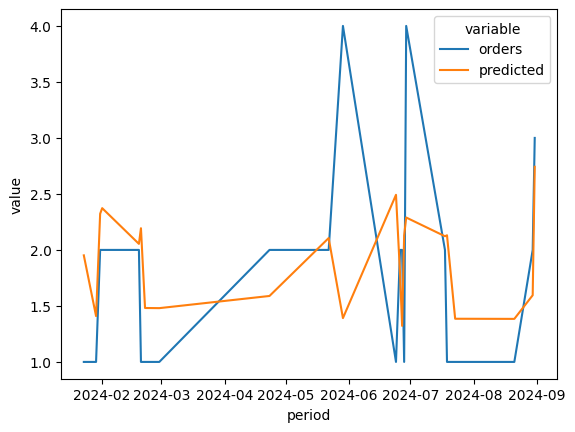

In [69]:
sns.lineplot(melt_df, x='period', y='value', hue='variable')
plt.show()

### Sarimax con pdmarima

In [70]:
from pmdarima import ARIMA

In [71]:
model_pdmarima = ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_pdmarima.fit(y=train_orders)
model_pdmarima.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  154
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -305.704
Date:                            Thu, 03 Oct 2024   AIC                            623.408
Time:                                    19:49:18   BIC                            641.101
Sample:                                         0   HQIC                           630.598
                                            - 154                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0013      0.003     -0.403      0.687      -0.008       0.005
ar.L1         -0.0132      0.142     -0.093      0.926      -0.291       0.264
ma.L1         -0.9996      5.404     -0.185      0.853     -11.591       9.592
ar.S.L12      -0.0602      0.096     -0.629      0.529      -0.248       0.127
ma.S.L12      -0.9997     77.406     -0.013      0.990    -152.713     150.714
sigma2         3.3769    266.849      0.013      0.990    -519.638     526.392
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               419.10
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             2.10
Prob(H) (two-sided):                  0.11   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
predictions_pdmarima = model_pdmarima.predict(len(test_orders))
predictions_pdmarima.name = 'predicciones_pdmarima'
predictions_pdmarima.head(10)

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


154    2.062874
155    1.233246
156    2.324015
157    1.591725
158    1.682199
159    2.391496
160    1.295388
161    1.203954
162    1.381381
163    1.558641
Name: predicciones_pdmarima, dtype: float64

### Lightgbm

### Plots predicciones

In [73]:
predictions_statsmodels.index = test_orders.index
predictions_skforecast.index = test_orders.index
predictions_pdmarima.index = test_orders.index

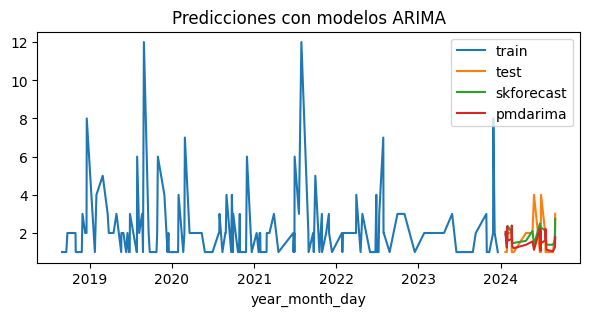

In [74]:
fig, ax = plt.subplots(figsize=(7, 3))
train_orders.plot(ax=ax, label='train')
test_orders.plot(ax=ax, label='test')
predictions_skforecast.plot(ax=ax, label='skforecast')
predictions_pdmarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend();

### REF: https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python